# Análise de assassinato em série
Autores ####: Liing Lu, Vi Nguyen

## 1. Limpeza/transformação de dados

Os dados utilizados nesta análise são coletados da [Wikipedia] (https://en.m.wikipedia.org/wiki/List_Of_Serial_Killers_By_Number_of_Victims). Este é um conjunto de dados disponível ao público que pode ser editado por qualquer pessoa. Ou seja, esse conjunto de dados contém informações que estão em andamento ou sujeitas à confiabilidade dos editores. 

Para armazenar os dados em um quadro de dados Pandas bem formatado, as técnicas de limpeza e transformação de dados foram aplicadas ao conteúdo original da página da web. Consulte este [link] (https://colab.research.google.com/drive/1vfxouhzgy53rzg08q9v54kzxpj7r5f6z?usp=sharing) para ver como isso foi feito. As palavras -chave relevantes extraídas através do uso do processamento de linguagem natural foram usadas para classificar o tipo de agressor e o modus operandi (M.0.) Usado pelo respectivo agressor.

In [1]:
## Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from pingouin import pairwise_tukey
import scipy.stats as stats

In [2]:
## Import data

df = pd.read_csv("serial_murder.csv", index_col=0)

## 2. Visualizações

Text(0.5, 1.0, 'Poison')

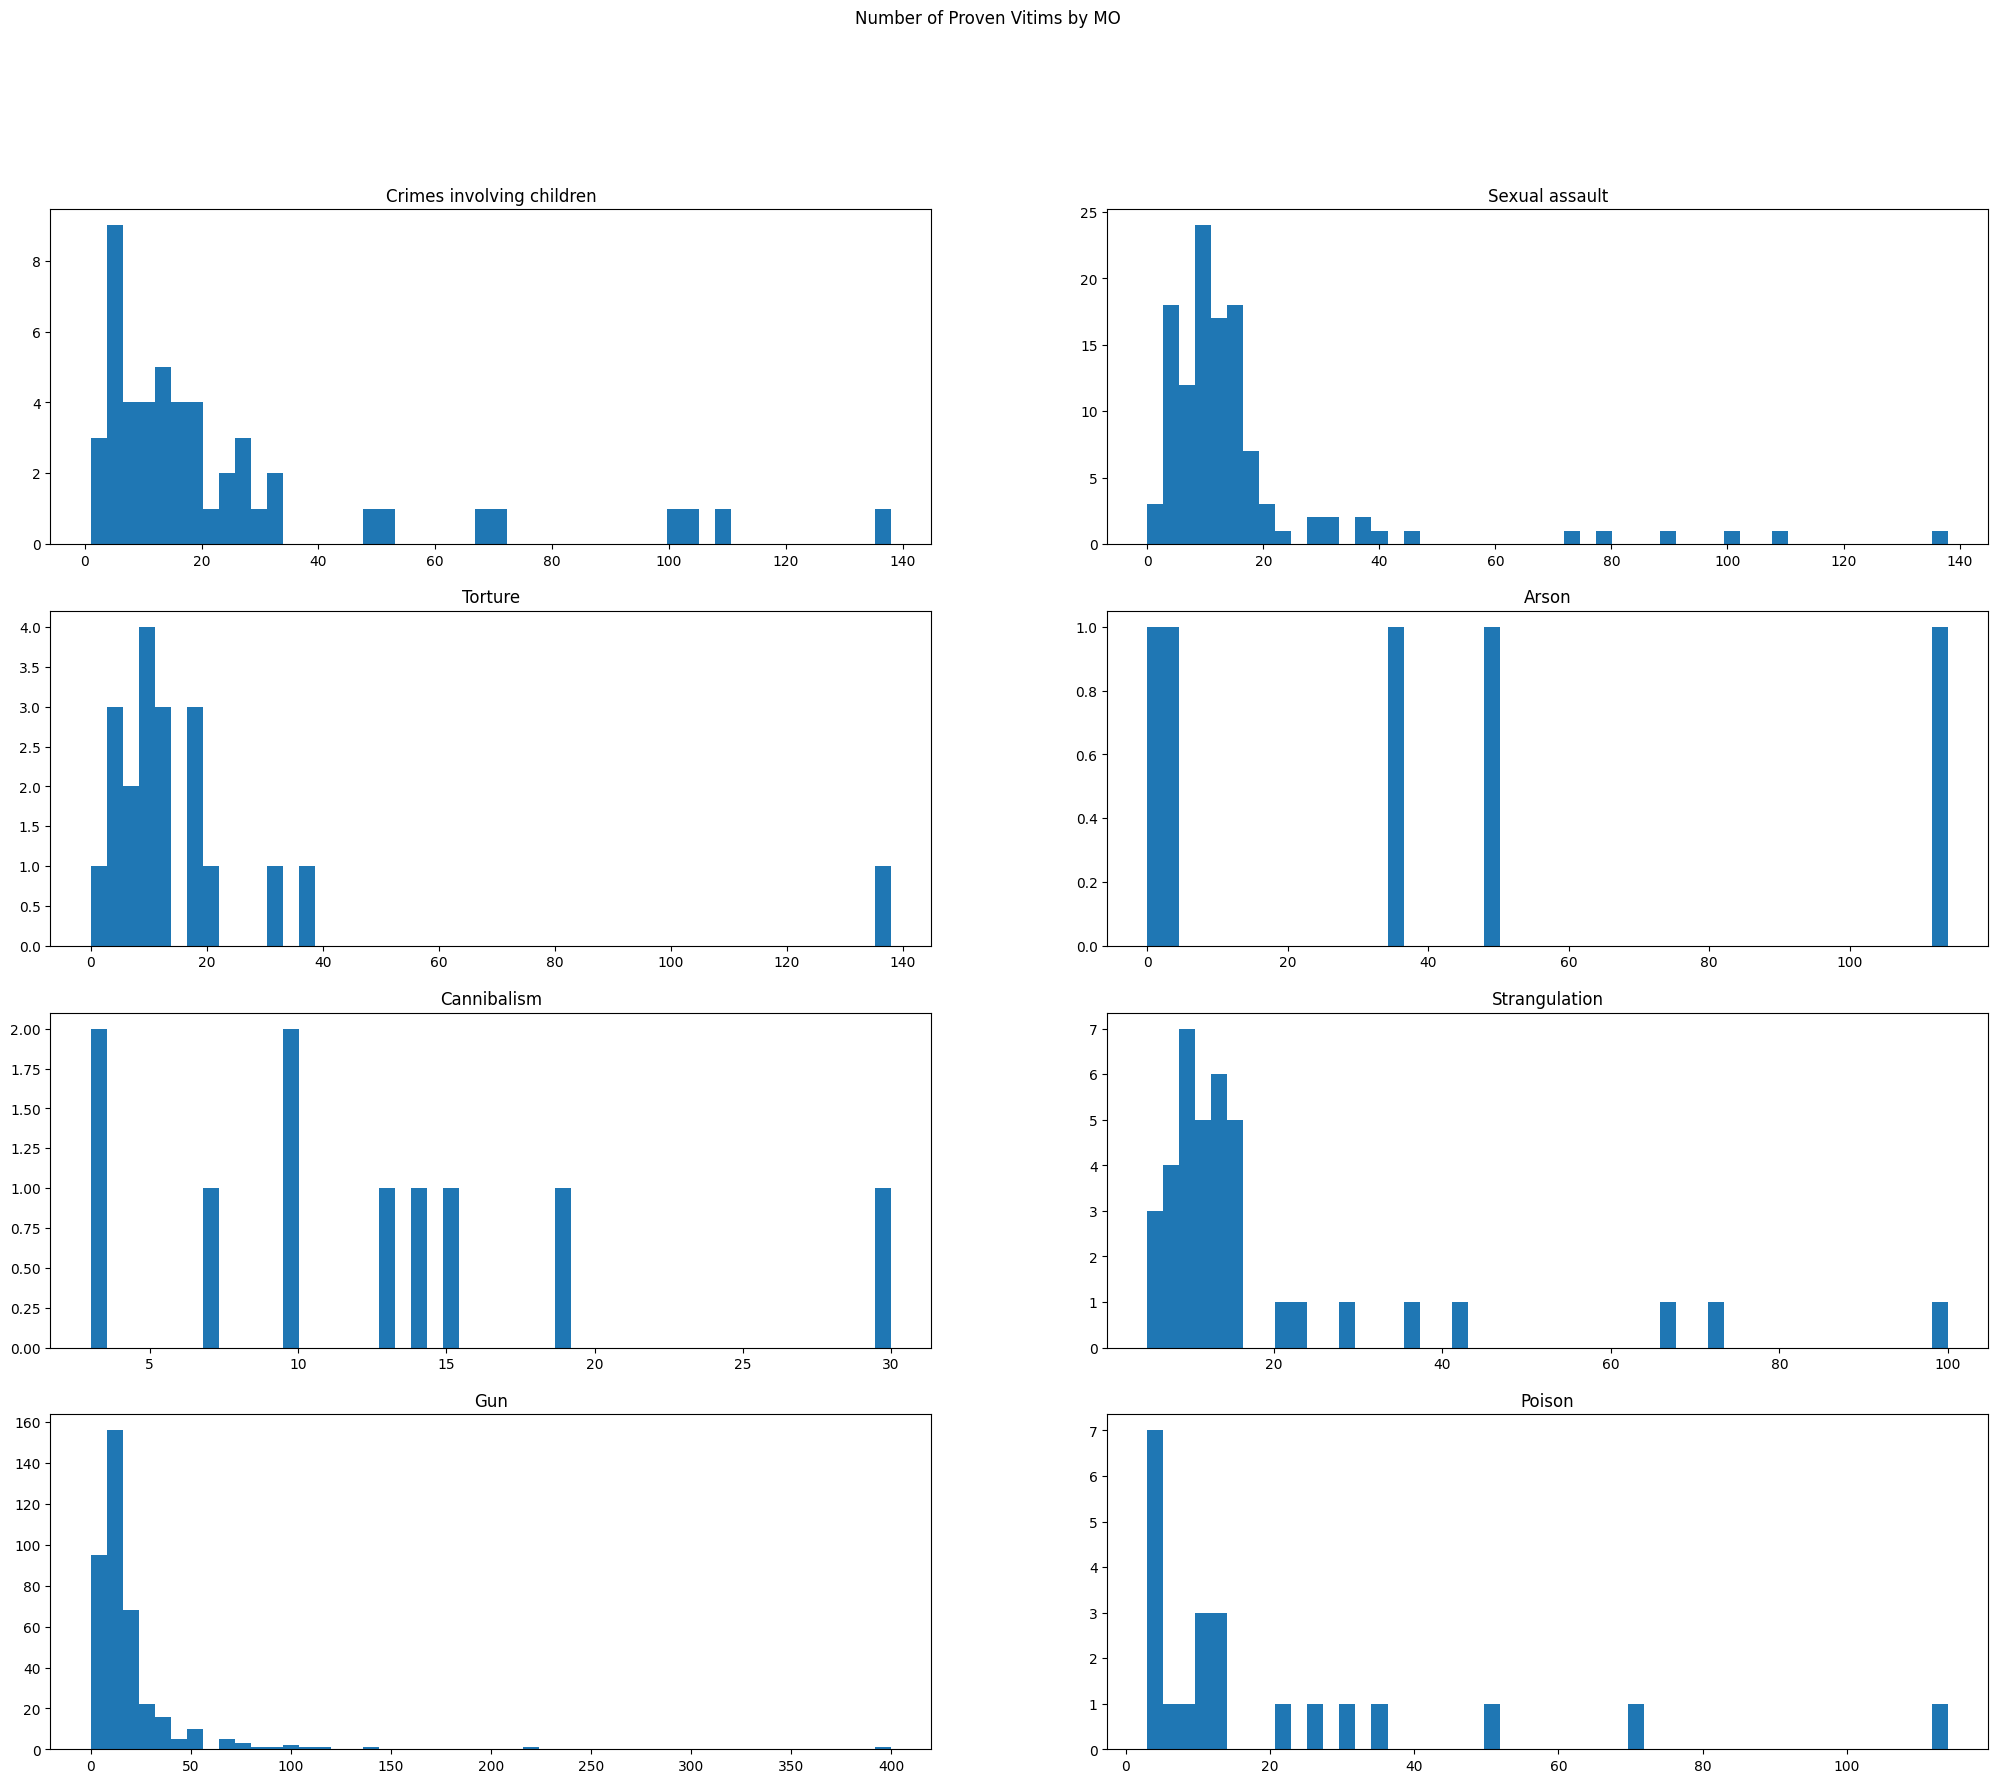

In [3]:
fig, ax = plt.subplots(4,2, figsize = (25, 20))

plt.suptitle('Number of Proven Vitims by MO')
ax[0,0].hist(df[df['involving children'] == 1]['Proven victims'], bins = 50,)
ax[0,0].set_title('Crimes involving children')
ax[0,1].hist(df[df['sexually motivated'] == 1]['Proven victims'], bins = 50)
ax[0,1].set_title('Sexual assault')
ax[1,0].hist(df[df['torture'] == 1]['Proven victims'], bins = 50)
ax[1,0].set_title('Torture')
ax[1,1].hist(df[df['arsenist'] == 1]['Proven victims'], bins = 50)
ax[1,1].set_title('Arson')
ax[2,0].hist(df[df['cannibalism'] == 1]['Proven victims'], bins = 50)
ax[2,0].set_title('Cannibalism')
ax[2,1].hist(df[df['strangulation'] == 1]['Proven victims'], bins = 50)
ax[2,1].set_title('Strangulation')
ax[3,0].hist(df[df['guns'] == 1]['Proven victims'], bins = 50)
ax[3,0].set_title('Gun')
ax[3,1].hist(df[df['poison'] == 1]['Proven victims'], bins = 50)
ax[3,1].set_title('Poison')

Entendimento:

O gráfico acima é facetado sobre os diferentes tipos de MO usados ​​pelos assassinos, com o eixo x sendo o número de vítimas comprovadas.

- Existem casos extremos em todos os tipos de MO com altas contagens de vítimas

** NOTA: Um assassino pode ter mais de 1 mês, assim é contabilizado em um ou mais histogramas

In [4]:
## Examine possible correlation between number of active years and number of active areas

df['Country'].replace('United States', 'US', inplace = True)

cross_cntries = []
for index, row in df.iterrows():
        
    ## Filter to killers active in more than 2 areas
      if len(row['Country'].split(' ')) >= 2:
            cross_cntries.append((row['Name'], len(row['Country'].split(' ')), row['Country'], 
                          row['Number of years active']))

            
active_areas_df = pd.DataFrame(columns = ['Name', 'Areas active', 'Countries', 'Years active'], data = cross_cntries)
active_areas_df = active_areas_df.sort_values(['Years active', 'Areas active'], ascending = False)

C:\Users\ead\AppData\Local\Temp\ipykernel_3368\2429959754.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace('United States', 'US', inplace = True)


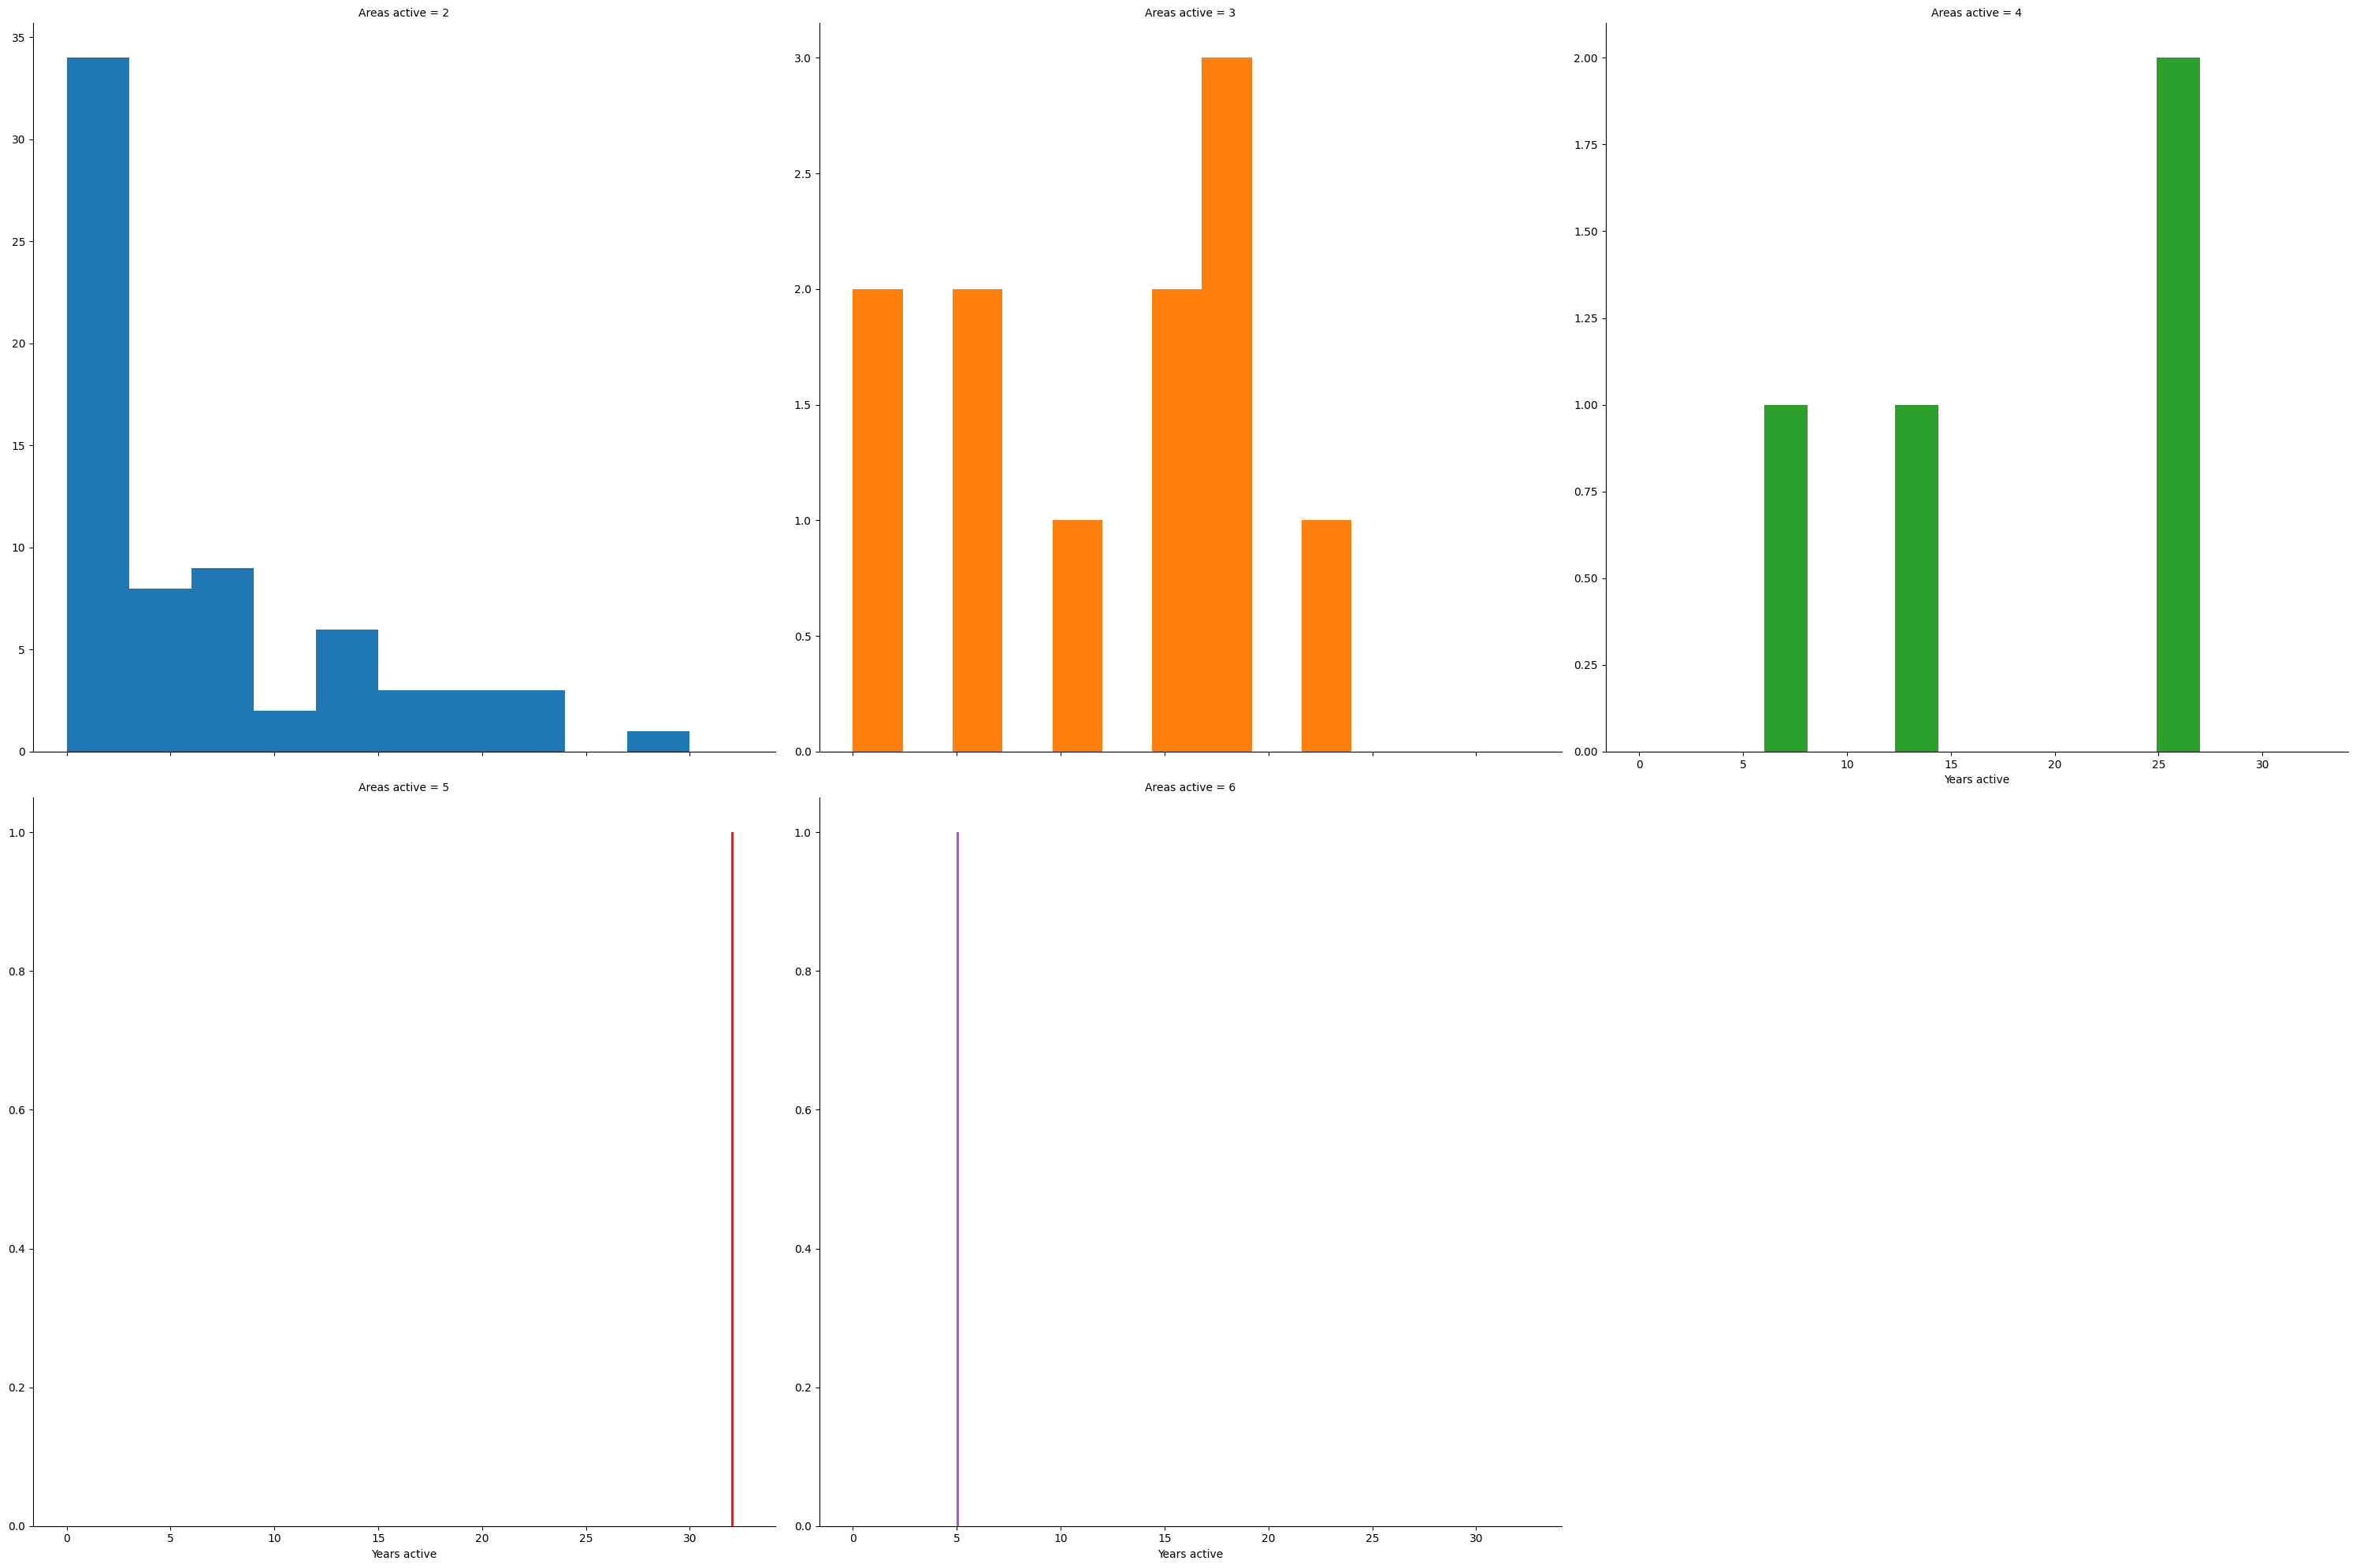

In [6]:
facet = sns.FacetGrid(active_areas_df, col="Areas active", hue = 'Areas active', height = 10, col_wrap=3,  margin_titles=True,
                     sharey = False)
facet.map(plt.hist, "Years active")

Percepções: 

- Os assassinos que se mudaram entre diferentes locais têm maior número de anos ativos. 

-> Mudar através das fronteiras do país pode ser usado como uma medida contra-forente para evitar a detecção

Text(0.5, 1.0, "Dotplot of number of MO's vs. Number of victims")

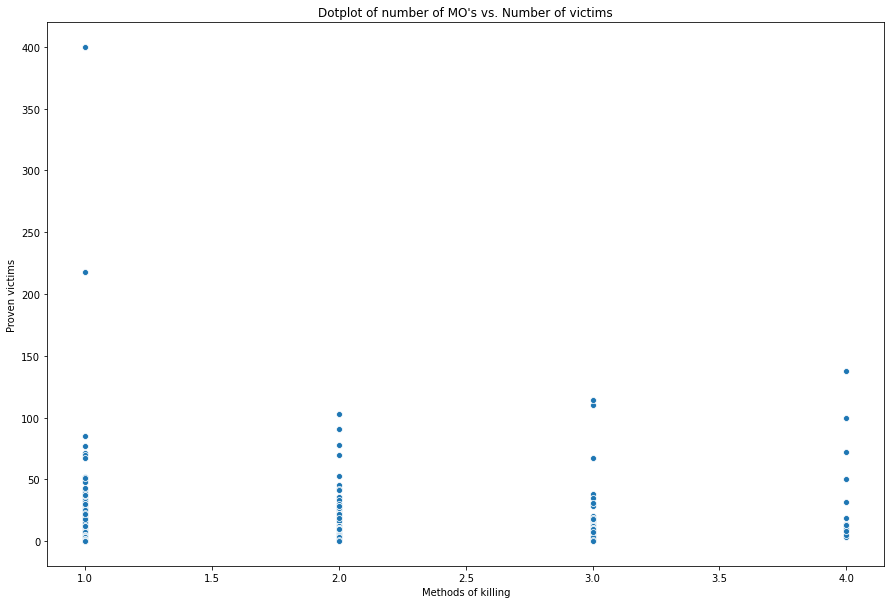

In [ ]:
plt.figure(figsize = (15, 10))
ax = sns.scatterplot(x = 'Methods of killing', y = 'Proven victims', data = df)
ax.set_title("Dotplot of number of MO's vs. Number of victims")

Entendimento:

- assassinos que têm apenas 1 mês são mais variantes em termos de quantas pessoas têm como alvo

-> Os infratores que exibem mais de 3 meses tendem a passar mais tempo com suas vítimas, com contagem mais baixa de vítimas. Aqueles com MOs inferiores, por outro lado, estão mais focados na quantidade.

Text(0.5, 1.0, 'Types of treatment for the convicted')

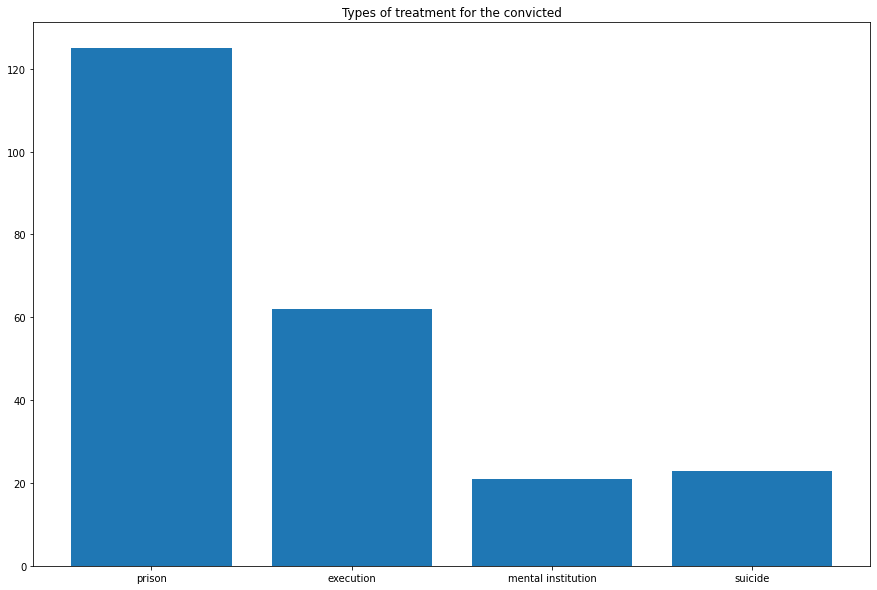

In [ ]:
conviction = {'prison': np.sum(df['prison']), 'execution':np.sum(df['execution']), 'mental institution':np.sum(df['mental institution']), 'suicide':np.sum(df['suicide'])}
plt.figure(figsize=(15,10))
plt.bar(conviction.keys(), conviction.values())
plt.title('Types of treatment for the convicted')

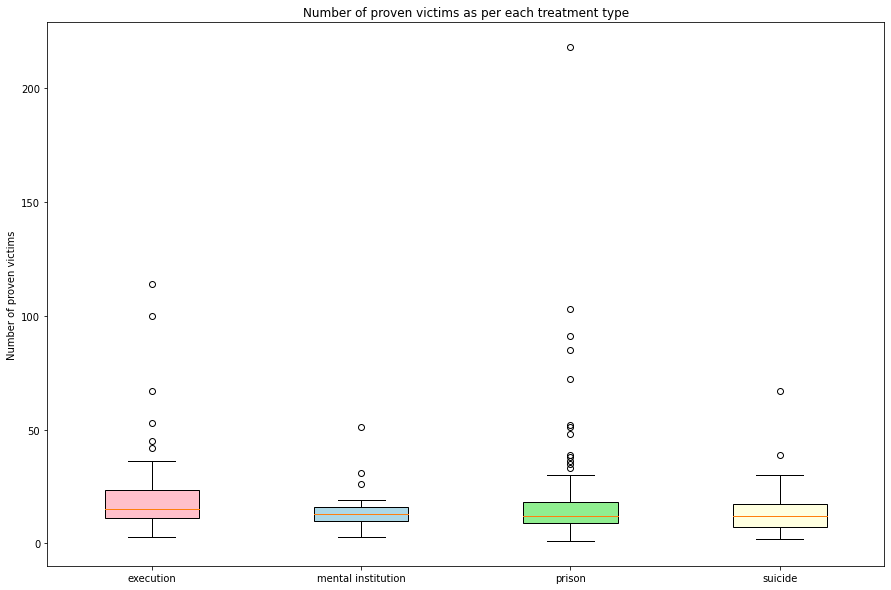

In [ ]:

data = [df[df['execution']==1]['Proven victims'],df[df['mental institution']==1]['Proven victims'],
        df[df['prison']==1]['Proven victims'],df[df['suicide']==1]['Proven victims']]
labels=['execution','mental institution','prison','suicide']
plt.figure(figsize=(15,10))
boxplot = plt.boxplot(data,labels=labels,patch_artist=True)
plt.title('Number of proven victims as per each treatment type')
colors = ['pink','lightblue','lightgreen','lightyellow']
for patch, color in zip(boxplot['boxes'], colors):
  patch.set_facecolor(color)
plt.ylabel('Number of proven victims')
plt.show()

In [ ]:
# summary statistics of each type
for d,con in zip(data,labels):
  print(con.title())
  print(d.describe(),end='\n\n')

Execution
count     62.000000
mean      20.887097
std       20.169856
min        3.000000
25%       11.000000
50%       15.000000
75%       23.250000
max      114.000000
Name: Proven victims, dtype: float64

Mental Institution
count    21.000000
mean     14.904762
std      10.639101
min       3.000000
25%      10.000000
50%      13.000000
75%      16.000000
max      51.000000
Name: Proven victims, dtype: float64

Prison
count    125.000000
mean      18.248000
std       24.154628
min        1.000000
25%        9.000000
50%       12.000000
75%       18.000000
max      218.000000
Name: Proven victims, dtype: float64

Suicide
count    23.000000
mean     15.608696
std      14.402459
min       2.000000
25%       7.000000
50%      12.000000
75%      17.500000
max      67.000000
Name: Proven victims, dtype: float64



Percepções:

- A maioria dos condenados foi enviada para a prisão enquanto o restante foi enviado para instituições mentais.

- O grupo executado de condenado mata 15 pessoas em mediana. Esse número médio de vítimas é o mais alto entre os três tipos de tratamento.

Assassinos em série e suas áreas ativas

In [ ]:
active_countries = active_areas_df['Countries'].str.replace('\xa0\xa0',',').tolist()
# split each killer's active countries 
temp = []
for country in active_countries:
  country = country.replace('\xa0',',').split(',')
  temp.extend([c.strip() for c in country])

# resolve different naming issues
temp2 = []
for country in temp:
    if '(' in country:
        country = country[:country.index('(')-1]
    if country in ['Allied-occupied Germany','German Empire','German Reich','Nazi Germany','Weimar Germany', 'Weimar Republic', 'West Germany',]:
        country = 'Germany'
    if country == 'Kingdom of Italy':
        country = 'Italy'
    if country == 'Persia':
        country = 'Iran'
    if country == 'Ottoman Empire':
        country = 'Turkey'
    if country == 'Portuguese Angola':
        country = 'Angola'
    if country == 'Czechoslovakia':
        country = 'Slovakia'
    if country == 'Yugoslavia':
        country = 'Croatia'
    if country == 'Soviet Union':
        country = 'Russia'
    if country == 'Czech Republic':
        country = 'Czechia'
    if country == 'United States':
        country = 'United States of America'
    if len(country)>2:
        temp2.append(country)

active_countries_count = {}

for country in temp2:
      active_countries_count[country] = active_countries_count.get(country,0)+1
active_countries_count = dict(sorted(active_countries_count.items(), key = lambda kv:(kv[1],kv[0]), reverse=True))

active_areas_df['Countries'] = active_areas_df['Countries'].apply(lambda x: x.replace('\xa0',','))

def Replace_cntries (country):
    country = country.strip()
    if '(' in country:
        country = country[:country.index('(')-1]
    if country in ['Allied-occupied Germany', 'German Empire','German Reich','Nazi Germany','Weimar Germany', 'Weimar Republic', 'West Germany']:
        country = 'Germany'
    if country == 'Kingdom of Italy':
        country = 'Italy'
    if country == 'Persia':
        country = 'Iran'
    if country == 'Ottoman Empire':
        country = 'Turkey'
    if country == 'Portuguese Angola':
        country = 'Angola'
    if country == 'Czechoslovakia':
        country = 'Slovakia'
    if country == 'Yugoslavia':
        country = 'Croatia'
    if country == 'Soviet Union':
        country = 'Russia'

    return country

locs_2 = active_areas_df.copy()[['Name', 'Countries']]

## "Explode" cells into rows
locs_2 = locs_2.set_index(['Name']).apply(lambda x: x.str.split(',').explode()).reset_index()

## Resolve naming issues
locs_2['Countries'] = locs_2['Countries'].apply(Replace_cntries)

## Drop nas's
locs_2.drop(locs_2.index[locs_2['Countries'] == ''], axis = 0, inplace = True)
locs_2

,Name,Countries
0,Volker Eckert,Germany
2,Volker Eckert,Germany
4,Volker Eckert,France
6,Volker Eckert,Spain
8,Volker Eckert,Czech Republic
...,...,...
177,Kenneth Erskine,United Kingdom
178,Steve Wright,United Kingdom
179,Robert Hicks Murray,United Kingdom
180,Petr Zelenka,Czech Republic


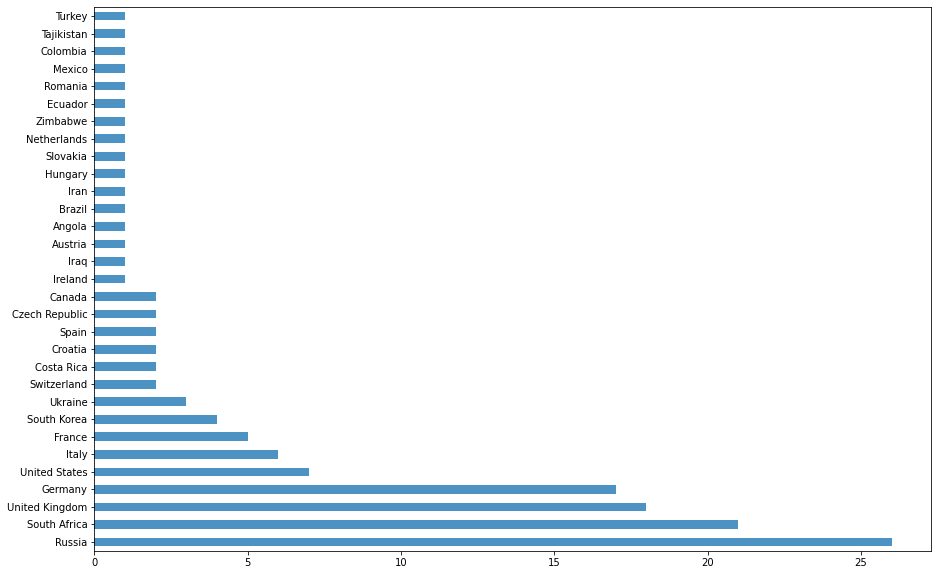

In [ ]:
# plot
#y_pos = np.arange(len(active_countries_count))
#frequency = list(active_countries_count.values())
#labels = tuple(active_countries_count.keys())

#fig, ax = plt.subplots(figsize=(15,10))
#ax.barh(y_pos, frequency ,color='teal')
#ax.set_yticks(y_pos)
#ax.set_yticklabels(labels)
#ax.invert_yaxis()
#ax.set_xlabel('Frequency')
#ax.set_title('Frequencies of the active countries')
#plt.show()
plt.figure(figsize=(15,10))
locs_2.Countries.value_counts().plot.barh(alpha=0.8)

In [ ]:
## Coordinates dataset
loc = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')
loc_df = pd.DataFrame(data = loc[0])
loc_df.drop(['country'], axis = 1, inplace = True)
loc_df

,latitude,longitude,name
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
...,...,...,...
240,15.552727,48.516388,Yemen
241,-12.827500,45.166244,Mayotte
242,-30.559482,22.937506,South Africa
243,-13.133897,27.849332,Zambia


In [ ]:
## Rename column

loc_df.rename(columns = {'name': 'Countries'}, inplace = True)

## Merge loc_df and locs_2

merged_areas = locs_2.merge(loc_df, how = 'outer', on = ['Countries']).dropna().sort_values(['Name'])
merged_areas

,Name,Countries,latitude,longitude
2,Adolf Seefeldt,Germany,51.165691,10.451526
3,Adolf Seefeldt,Germany,51.165691,10.451526
4,Adolf Seefeldt,Germany,51.165691,10.451526
128,Adrián Arroyo Gutiérrez,Costa Rica,9.748917,-83.753428
79,Alexander Labutkin,Russia,61.524010,105.318756
...,...,...,...,...
94,Yvan Keller,Switzerland,46.818188,8.227512
8,Yvan Keller,Germany,51.165691,10.451526
18,Yvan Keller,France,46.227638,2.213749
119,Ángel Maturino Reséndiz,Mexico,23.634501,-102.552784


Alguns deles só se mudaram dentro das fronteiras de seus países

In [ ]:
## Only keep those offenders that move across country borders as a few of them relocated within their countries

new_names = []
for i in merged_areas['Name'].unique():
    cntries = set(merged_areas[merged_areas['Name'] == i]['Countries'].to_list())
    if len(cntries) > 2:
        new_names.append(i)

new_areas = merged_areas[merged_areas['Name'].isin(new_names)]
new_areas

,Name,Countries,latitude,longitude
42,Ali Asghar Borujerdi,Iraq,33.223191,43.679291
43,Ali Asghar Borujerdi,Iran,32.427908,53.688046
41,Ali Asghar Borujerdi,Turkey,38.963745,35.243322
122,Daniel Camargo Barbosa,Brazil,-14.235004,-51.925280
121,Daniel Camargo Barbosa,Ecuador,-1.831239,-78.183406
120,Daniel Camargo Barbosa,Colombia,4.570868,-74.297333
92,Jack Unterweger,Austria,47.516231,14.550072
93,Jack Unterweger,Slovakia,48.669026,19.699024
35,Jack Unterweger,United States,37.090240,-95.712891
19,Manuel Delgado Villegas,France,46.227638,2.213749


In [ ]:
## Create an empty map
folium_map = folium.Map(location=[37.2972,1.9577],  #  Europe coordinates
                       zoom_start = 4,
                       tiles = 'stamentoner')

## Colors to identify each offender
colors = ['red', 'blue', 'green', 'grey', 'purple', 'orange', 'yellow', 'cyan', 'brown']
## This is to adjust the size of the circles according to the killers' active years
years_active = active_areas_df[active_areas_df['Name'].isin(new_names)].sort_values(['Name'])['Years active'].to_list()


for killer in new_areas['Name'].unique().tolist():

    color = colors[new_names.index(killer)]
    ## Size of the marker is their number of active years
    radius = years_active[new_names.index(killer)]

    ## This is to add lines connecting the circle at the end of the for loop
    coords = []

    df1 = new_areas[new_areas['Name'] == killer]

    for index, row in df1.iterrows():
      ## Add popup text
        popup_text = """{}, {}, {}"""
        popup_text = popup_text.format('Offender: ' + killer + '\n',
                               'Country: ' + row['Countries'] + '\n', str(radius) + ' years')
        lon = row['longitude']
        lat = row['latitude']

      ## Polyline requires that locations be put in a list of lists
        coords.append([lat, lon])

      ## Locate the killer's zones on map
        folium.CircleMarker(location = (lat, lon),
                       weight = 5, radius = radius, color = color,
                       fill = True, fill_color = color,
                       popup = popup_text).add_to(folium_map)
        
    ## Use the locations list to draw connecting lines
    my_PolyLine=folium.PolyLine(locations=coords, weight=2, color = color)
    folium_map.add_child(my_PolyLine)
    
folium_map

O mapa acima mostra a rota que cada um dos assassinos em série seguiu. Usando essa representação geográfica, pode -se determinar a zona de conforto do assassino. As rotas representadas neste mapa são registradas pelos locais de dumping, onde as vítimas foram descartadas/mortas.

In [ ]:
world_homocides = pd.DataFrame(data = active_countries_count.items(), columns = ['Country', 'Total killers in area'])
world_homocides

,Country,Total killers in area
0,Russia,26
1,South Africa,21
2,United Kingdom,18
3,Germany,17
4,United States of America,7
5,Italy,6
6,France,5
7,South Korea,4
8,Ukraine,3
9,Switzerland,2


In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
world_geo = f'{url}/world-countries.json'

## Create an empty map
m = folium.Map(location=[37.2972,1.9577], zoom_start=3, tiles = 'stamentoner')

## add choropleth layer
choropleth = folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=world_homocides,
    columns=['Country', 'Total killers in area'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=1,
    line_opacity=1,
    legend_name='Total killers in country'
).add_to(m)

# add labels indicating the name of the country
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

## Add layer
folium.LayerControl().add_to(m)

## Display map
m

## 3. Teste de hipótese

*Hipótese nula*: Não há variação no número médio de vítimas confirmadas para todos os grupos de número de métodos de morte.

*Hipótese alternativa*: Pelo menos o número médio de vítimas confirmadas de um grupo de métodos de matança difere de outros grupos.

Referência:
https://reneshbedre.github.io/blog/anova.html

In [ ]:
## extract the serial killer group/organization
# remove unidentified killers
names = df[~(df.Notes.apply(lambda x: ('unidentified serial killer' in x.lower()) | 
                                         ('theoretical' in x.lower()) |
                                        ('unidentified killer' in x.lower())))
          ## remove the nicknames which represent unidentified killers
          & ~(df.Name.apply(lambda x: ('The' in x) or ('Killer' in x) or ('Maniac' in x) or ('serial' in x)))].Name.to_list() 
group_names = names[names.index('Murder Incorporated'): names.index('Beasts of Satan')+1]
#groups = df1.loc[df1.Name.isin(group_names)]

## df2 only contains individual killers
df2 = df[df.Name.isin(names) & ~df.Name.isin(group_names)]

## convert the methods of killing to a categorical variable
df2['Methods of killing'] = df2['Methods of killing'].astype('category')

## check the value counts
df2['Methods of killing'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


1    157
2    107
3     44
4     12
Name: Methods of killing, dtype: int64

Text(0.5, 1.0, "Boxplot of number of proven victims by number of MO's used")

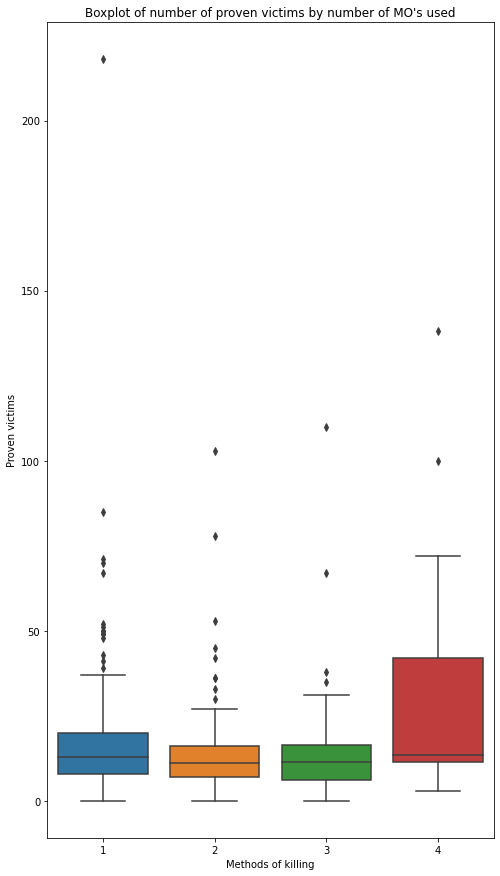

In [ ]:
# boxplots
plt.figure(figsize = (8, 15))
sns.boxplot(x = 'Methods of killing', y = 'Proven victims', data = df2)
plt.title("Boxplot of number of proven victims by number of MO's used")

Text(0.5, 1.0, "Boxplot of number of proven victims by number of MO's used")

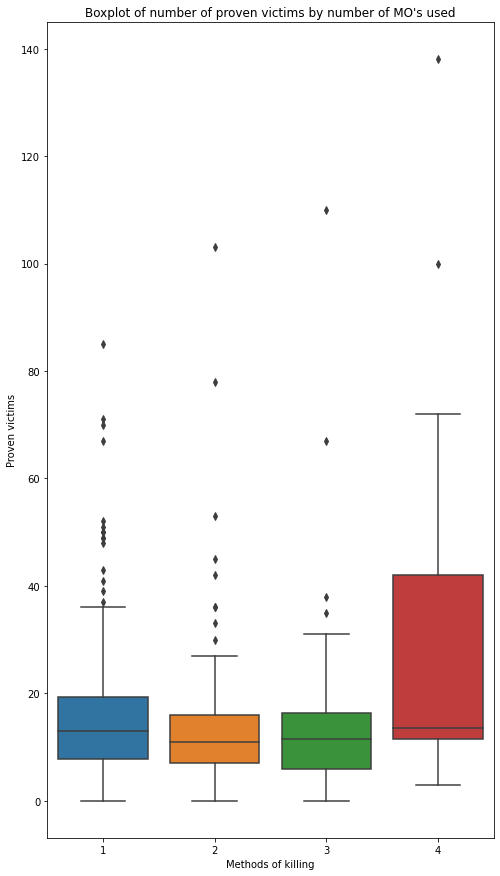

In [ ]:
# Remove extreme outliers
plt.figure(figsize = (8, 15))
sns.boxplot(x = 'Methods of killing', y = 'Proven victims', data = df2[df2['Proven victims']<200])
plt.title("Boxplot of number of proven victims by number of MO's used")

In [ ]:
# Create a list of lists that contain the Proven victims values by Methods of killing
mo_list = []
for i in df2['Methods of killing'].unique():
    mo_list.append(df2[(df2['Methods of killing'] == i) & (df2['Proven victims']<200)]['Proven victims'].to_list())

# perform one-way ANOVA test

f_val, p_val = stats.f_oneway(*mo_list)
print(f_val, p_val)

5.795690327763586 0.0007233736889731828


In [ ]:
# uses panda dataframe for the one-way ANOVA test
anova_df = df2[['Methods of killing','Proven victims']][df2['Proven victims']<200].sort_values(by='Methods of killing').reset_index(drop=True)

mo1 = anova_df[anova_df['Methods of killing']==1]['Proven victims'].copy()
mo2 = anova_df[anova_df['Methods of killing']==2]['Proven victims'].copy()
mo3 = anova_df[anova_df['Methods of killing']==3]['Proven victims'].copy()
mo4 = anova_df[anova_df['Methods of killing']==4]['Proven victims'].copy()


f_val, p_val = stats.f_oneway(mo1, mo2, mo3, mo4)
print(f_val,p_val)

5.795690327763588 0.0007233736889731828


In [ ]:
# Ordinary Least Squares (OLS) model

anova_df.columns = ['MOs','Proven_victims']
model = ols("Proven_victims ~ MOs", data=anova_df).fit()

O valor p deste teste ANOVA unidirecional é de 0,0007, que é menor que o nível alfa de 0,05. Portanto, a hipótese nula é rejeitada em favor da hipótese alternativa. 

Em seguida, realizamos um teste post-hoc para determinar quais métodos de morte são significativamente diferentes dos outros.

Teste post-hoc: teste HSD de Tukey

In [ ]:
## Post-hoc comparison using Tukey HSD test

# perform multiple pairwise comparison (Tukey HSD)
# for unbalanced data, pairwise_tukey uses Tukey-Kramer test
m_comp = pairwise_tukey(data=anova_df, dv='Proven_victims', between='MOs')
m_comp

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,16.916667,14.672897,2.243769,2.132755,1.052052,0.695098,0.131677
1,1,3,16.916667,15.931818,0.984848,2.900305,0.339567,0.900000,0.057743
2,1,4,16.916667,36.166667,-19.250000,5.090014,-3.781915,0.001065,-1.127831
3,2,3,14.672897,15.931818,-1.258921,3.042899,-0.413724,0.900000,-0.073720
4,2,4,14.672897,36.166667,-21.493769,5.172592,-4.155319,0.001000,-1.256888
5,3,4,15.931818,36.166667,-20.234848,5.533429,-3.656837,0.001696,-1.174303


Os resultados do teste de HSD de Tukey sugerem que o grupo com 4 métodos de matança com todos os outros grupos rejeita a hipótese nula (p-tukey <0,05) e indica diferença estatística significativa no número médio de vítimas comprovadas.

## Teste as suposições da ANOVA

1. Distribuição normal dos resíduos: teste de Shapiro-Wilk. 
  
  *Hipótese nula*: Os dados são extraídos da distribuição normal.
2. Homogeneidade de variações: teste de Bartlett. O teste de Levene pode ser usado quando os dados não são extraídos da distribuição normal. 
  
  *Hipótese nula*: As amostras de populações têm variações iguais.

In [ ]:
# Normal distribution of residuals
# Null hypothesis: data is drawn from normal distribution.
# Shapiro test

w, p_value = stats.shapiro(model.resid)
print(w, p_value)

0.7383937239646912 4.242938234740422e-22


Como o valor p (6.32E-31) do teste de Shapiro é menor que o nível alfa de 0,05, rejeitamos a hipótese nula em favor da hipótese alternativa e concluímos que os dados ** não são extraídos da distribuição normal **.

In [ ]:
# Homogeneity of variances
# Null hypothesis: samples from populations have equal variances.
# Levene test
l, p_value = stats.levene(mo1, mo2, mo3, mo4)
print(l, p_value)

5.768292323653724 0.0007505948761957644


Como o valor p (0,0003) é significativo, rejeitamos a hipótese nula em favor da hipótese alternativa e concluímos que os grupos de métodos de assassinatos ** não têm variações iguais. **

## 4. Banco de dados

In [ ]:
import sqlite3

# Establish connection and cursor
conn = sqlite3.connect('SerialKillerData.db')
c = conn.cursor()

# Country
c.execute('DROP TABLE IF EXISTS country;') # remove duplicate table first
c.execute('''CREATE TABLE country 
             (cid INTEGER PRIMARY KEY, Name TEXT);''') # create table
for country in active_countries_count.keys():
  c.execute("INSERT INTO country (Name) VALUES ('%s');" %country) # insert row into table
conn.commit() # Save (commit) the changes

# Methods of killing
mos = ['children','sexual assault','torture','arson','cannibalism','strangulation','gun','poison']
c.execute('DROP TABLE IF EXISTS methods_killing;') # remove duplicate table first
c.execute('''CREATE TABLE methods_killing 
             (moid INTEGER PRIMARY KEY, Method TEXT);''') # create table
for m in mos:
  c.execute("INSERT INTO methods_killing (Method) VALUES ('%s');" %m) # insert row into table
conn.commit() # Save (commit) the changes

# Organization
organization = ['individual','group']
c.execute('DROP TABLE IF EXISTS organization;') # remove duplicate table first
c.execute('''CREATE TABLE organization 
             (oid INTEGER PRIMARY KEY, Form TEXT);''') # create table
for o in organization:
  c.execute("INSERT INTO organization (Form) VALUES ('%s');" %o) # insert row into table
conn.commit() # Save (commit) the changes

In [ ]:
# df with only identified killers
df_indentified = df1[df1.Name.isin(names)]
df_indentified['Organization'] = df_indentified['Name'].apply(lambda x: 2 if x in group_names else 1) # label individual (1), group (2)

# serial killers dataset
serial_killer = df_indentified.reset_index(drop=True).reset_index().rename(columns={'index':'id'}).copy()
serial_killer['id'] = serial_killer['id'].apply(lambda x: x+1) # fix key to start from 1

In [ ]:
# Serial Killer
c.execute('DROP TABLE IF EXISTS serial_killer;') # remove duplicate table first
c.execute('''CREATE TABLE serial_killer 
             (id INTEGER PRIMARY KEY, Name TEXT, Proven_victims INTEGER(0), 
             Organization INTEGER(0), Start_year INTEGER(0), End_year INTEGER(0),
             Active_years INTEGER(0));''') # create table
cols = ['id','Name','Proven victims','Organization','Start year','End year','Number of years active']
serial_killer[cols].to_sql('serial_killer', conn, if_exists='replace', index = False) # insert row into table
conn.commit() # Save (commit) the changes

KeyError: "['Number of years active', 'Start year', 'End year', 'Proven victims'] not in index"

In [ ]:
#for me in c.execute('SELECT * FROM serial_killer'):
#  print(me)

In [ ]:
# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()